In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
%matplotlib inline

In [3]:
import turbo_seti.find_event as find

# Note to self:

You don't need to assign weights to the freqeuncies in a histogram because `turbo_seti` only keeps the **top** hit in a frequency range

I previously had my histogram function assigning weights to everything, but now I will try making a histogram with just the frequency column

In [4]:
ten_files = [
    "dat_files/GBT_57523_69379_HIP17147_fine.dat", # good
    "dat_files/GBT_57606_50058_HIP20901_fine.dat", # good
    "dat_files/GBT_57456_02669_HIP39826_fine.dat", # good
    "dat_files/GBT_57803_80733_HIP4436_fine.dat",  # not done yet
    "dat_files/GBT_57599_55512_HIP45493_fine.dat", # good
    "dat_files/GBT_57459_34297_HIP65352_fine.dat", # not done yet
    "dat_files/GBT_57650_54573_HIP66704_fine.dat", # not done yet
    "dat_files/GBT_57523_22406_HIP74981_fine.dat", # not done yet
    "dat_files/GBT_57680_15520_HIP7981_fine.dat",  # not done yet
    "dat_files/GBT_57664_79761_HIP82860_fine.dat" # good
]

In [5]:
the_ones_that_exist = [
    "dat_files/GBT_57523_69379_HIP17147_fine.dat", # good
    "dat_files/GBT_57606_50058_HIP20901_fine.dat", # good
    "dat_files/GBT_57456_02669_HIP39826_fine.dat", # good
    "dat_files/GBT_57599_55512_HIP45493_fine.dat", # good
    "dat_files/GBT_57664_79761_HIP82860_fine.dat" # good
]

## Function to make a histogram from a .dat file

In [6]:
def freq_hist(file, ylim=None, freq_range=None, band=None):
    """Makes a histogram of the frequencies for data with 1MHz bins
    
    Args:
    ylim: the upper limit on a plot window. The figure will have a vertical range of (0, ylim)
    freq_range: (lower, upper) - tuple giving the lower and upper limits on the frequency range
    
    Assumes that the .dat file has a 'Freq' column """
    import turbo_seti.find_event as find
    
    tbl = find.read_dat(file)
    if freq_range != None:
        lower = freq_range[0]
        upper = freq_range[1]
        range_list = (tbl["Freq"] > lower) & (tbl["Freq"] < upper)
        tbl = tbl[range_list]
    min_freq = min(tbl["Freq"])
    max_freq = max(tbl["Freq"])
    
    plt.figure(figsize=(20, 10))
    bins = np.arange(min_freq, max_freq, 1)
    plt.hist(tbl["Freq"], bins=bins)#, 
             #weights=tbl["FullNumHitsInRange"])
    

    if band == "X":
        letter = "X "
        bw = " (7.8-12.3 GHz)"
    elif band == "L":
        letter = "L "
        bw = " (1.10-1.90 GHz)"
    else:
        letter = ""
        bw = ""
        
    title = letter + "Band Data" + bw
    plt.title(title)
    plt.ylabel("Hits")
    plt.xlabel("Frequency [MHz]")
    if ylim != None:
        plt.ylim((0, ylim))
    me = "//home/danielb/GBT_statistics/"
    if type(file) == str:
        filename = me+file+"_Histogram.pdf"
    else:
        filename = me+"Histogram.pdf"
    plt.savefig(filename)
    plt.show()

## Function to make a histogram from a pandas table

In [8]:
def freq_hist_from_pandas(tbl, file_name):
    """makes a histogram of the frequencies weighted by the number of hits
    
    Takes a pandas table and the name to save the file as"""
    min_freq = min(tbl["Freq"])
    max_freq = max(tbl["Freq"])

    plt.figure(figsize=(20, 10))
    bins = np.arange(min_freq, max_freq, 1)
    plt.hist(tbl["Freq"], bins=bins)#, 
             #weights=tbl["FullNumHitsInRange"])

    title = "Multi-File L-Band Frequency Histogram"
    plt.title(title)
    plt.ylabel("Hits")
    plt.xlabel("Frequency [MHz]")

    me = "//home/danielb/GBT_statistics/"
    filename = me + file_name + ".pdf"
    plt.savefig(filename)
    plt.show()

## Making Histograms of the data I have available

In [9]:
for file in ten_files:
    freq_hist(file, band="L")

## Making tables with the data from the available .dat files

In [10]:
import turbo_seti.find_event as find

t0 = find.read_dat(the_ones_that_exist[0])
t1 = find.read_dat(the_ones_that_exist[1])
t2 = find.read_dat(the_ones_that_exist[2])
t3 = find.read_dat(the_ones_that_exist[3])
t4 = find.read_dat(the_ones_that_exist[4])

In [11]:
np.average(t0["FullNumHitsInRange"])

6392111.583587657

In [12]:
tbl = t0.append(t1)
tbl = tbl.append(t2)
tbl = tbl.append(t3)
tbl = tbl.append(t4)

## Function to normalize by average number of hits for a table

In [80]:
def normalized_hits(take):
    """gets the columns ["FullNumHitsInRange"] ["Freq"], normalizes by the number of hits in 
    ["FullNumHitsInRange"] and adds the columns to a new table"""
    
    avg = np.average(take["FullNumHitsInRange"])
    div_by_average = take["FullNumHitsInRange"]/avg
    temp = {"Freq": take["Freq"], "FullNumHitsInRange": div_by_average}
    
    return pd.DataFrame(temp)

## Function to add normalized table to another table

In [81]:
def add_columns(tbl, take):
    """returns the normalized number of hits added to the end of tbl"""
    
    temp = normalized_hits(take)
    two_columns = tbl[["Freq", "FullNumHitsInRange"]]
    added = two_columns.append(temp)
    return pd.DataFrame(added) 

## Histogram of all five files added together

In [14]:
min_freq = min(tbl["Freq"])
max_freq = max(tbl["Freq"])

plt.figure(figsize=(20, 10))
bins = np.arange(min_freq, max_freq, 1)
plt.hist(tbl["Freq"], bins=bins)#, 
        #weights=tbl["FullNumHitsInRange"])

title = "Five File L-Band Frequency Histogram"
plt.title(title)
plt.ylabel("Hits")
plt.xlabel("Frequency [MHz]")

me = "//home/danielb/GBT_statistics/"
filename = me+"Five_file_Histogram_weights.pdf"
plt.savefig(filename)
plt.show()

Some of the bins drowned out the rest of the bins, so I will try plotting a histogram of the five file average.

## Making the five file average

In [12]:
average_hits = test["FullNumHitsInRange"]/5

In [13]:
min_freq = min(tbl["Freq"])
max_freq = max(tbl["Freq"])

plt.figure(figsize=(20, 10))
bins = np.arange(min_freq, max_freq, 1)
plt.hist(tbl["Freq"], bins=bins, 
         weights=average_hits)

title = "Multi-File Average L-Band Frequency Histogram"
plt.title(title)
plt.ylabel("Hits")
plt.xlabel("Frequency [MHz]")

me = "//home/danielb/GBT_statistics/"
filename = me+"Five_file_average_Histogram.pdf"
#plt.ylim((0, 30000))
plt.savefig(filename)
plt.show()

That was not enlightening in the least. Matplotlib autoscales the axes, so shrinking the height of each bin by the same amount just returns the same plot lol

I think next I will try plotting the number of hits divided by the average or median. This will probably return division by zero errors in the empty columns. But I'll deal with that when the time comes. 

#### This ^^ may not have been the way to go

## I don't think my reasoning for this process was well founded, may delete later

In [15]:
#may delete
divided_by_average = test["FullNumHitsInRange"]/average_hits

In [17]:
# may delete
min_freq = min(tbl["Freq"])
max_freq = max(tbl["Freq"])

plt.figure(figsize=(20, 10))
bins = np.arange(min_freq, max_freq, 1)
plt.hist(tbl["Freq"], bins=bins, 
         weights=divided_by_average)

title = "Multi-File Sum Divided by Average L-Band Frequency Histogram"
plt.title(title)
plt.ylabel("Hits")
plt.xlabel("Frequency [MHz]")

me = "//home/danielb/GBT_statistics/"
filename = me+"Five_file_divided_by_average_Histogram.pdf"
plt.savefig(filename)
plt.show()

## Trying to make a histogram using the functions I made above

Using functions `normalized_hits` and `add_columns`

In [34]:
temp = normalized_hits(t0)
rest_of_tables = [t1, t2, t3, t4]

for table in rest_of_tables:
    temp = add_columns(temp, table)

In [35]:
temp

,Freq,FullNumHitsInRange
0,1926.000000,0.002373
1,1924.991802,0.002373
2,1924.804688,0.002373
3,1923.834701,0.002373
4,1923.674101,0.002373
...,...,...
4250,1031.999999,0.001706
4251,1031.250000,0.001706
4252,1028.320312,0.001705
4253,1025.981879,0.001705


In [46]:
min_freq = min(temp["Freq"])
max_freq = max(temp["Freq"])

plt.figure(figsize=(20, 10))
bins = np.arange(min_freq, max_freq, 1)
plt.hist(temp["Freq"], bins=bins, 
         weights=temp["FullNumHitsInRange"])

title = "Normalized each file by its Average: L-Band Frequency Histogram"
plt.title(title)
plt.ylabel("Hits")
plt.xlabel("Frequency [MHz]")

me = "//home/danielb/GBT_statistics/"
filename = me+"Normalized_by_average_number_of_hits_Histogram.pdf"
plt.savefig(filename)
plt.show()

I should make a function for this because I end up doing a lot of copy/paste

## Trying the above functions on the full ten files:

In [54]:
zz = [1,2,3]
zz.append(4)
zz.pop(0)
zz

[2, 3, 4]

In [15]:
import turbo_seti.find_event as find

In [20]:
ten_pandas = []

for file in ten_files:
    temp_tbl = find.read_dat(file)
    ten_pandas.append(temp_tbl)

In [55]:
#do not run
large_panda = normalized_hits(ten_pandas.pop(0))

for table in ten_pandas:
    large_panda = add_columns(large_panda, table)

In [21]:
large_panda = ten_pandas.pop(0)

for file in ten_pandas:
    large_panda = large_panda.append(file)
    
large_panda

,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
0,1,-0.000000,86.524814,1926.000000,95056,1926.001633,1925.998372,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
1,2,-0.236473,11.454542,1924.991802,450618,1924.993436,1924.990175,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
2,3,-0.000000,250911.704644,1924.804688,516608,1924.806321,1924.803060,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
3,4,-0.049265,13.127995,1923.834701,858694,1923.836335,1923.833074,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
4,5,-0.049265,11.954595,1923.674101,915333,1923.675735,1923.672474,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,4251,-0.000000,16.304206,1031.999999,255853,1032.001633,1031.998370,305,13174,GBT_57664_79761_HIP82860_fine.h5,HIP82860,57664.923159722224,16h56m01.98s,65d08m06.008s,18.253611,-2.793968,,,,
4251,4252,-0.000000,415732.579833,1031.250000,524288,1031.251634,1031.248371,305,13174,GBT_57664_79761_HIP82860_fine.h5,HIP82860,57664.923159722224,16h56m01.98s,65d08m06.008s,18.253611,-2.793968,,,,
4252,4253,-0.000000,545399.615282,1028.320312,524288,1028.321947,1028.318684,306,13167,GBT_57664_79761_HIP82860_fine.h5,HIP82860,57664.923159722224,16h56m01.98s,65d08m06.008s,18.253611,-2.793968,,,,
4253,4254,0.009566,10.705378,1025.981879,312670,1025.983513,1025.980250,307,13168,GBT_57664_79761_HIP82860_fine.h5,HIP82860,57664.923159722224,16h56m01.98s,65d08m06.008s,18.253611,-2.793968,,,,


In [22]:
freq_hist_from_pandas(large_panda, "Ten_file_histogram")

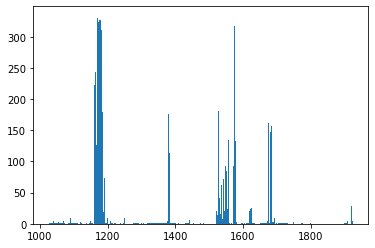

In [87]:
plt.figure()
bins = np.arange(min(t0["Freq"]), max(t0["Freq"]), 1)
plt.hist(t0["Freq"], bins=bins);

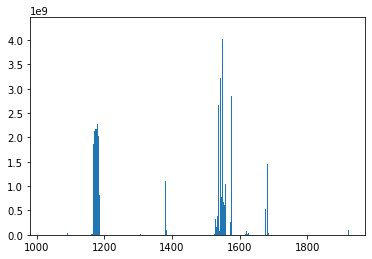

In [89]:
plt.figure()
bins = np.arange(min(t0["Freq"]), max(t0["Freq"]), 1)
plt.hist(t0["Freq"], bins=bins, weights=t0["FullNumHitsInRange"]);

In [99]:
t0#.sort_values("SNR", ascending=False)

,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
0,1,-0.000000,86.524814,1926.000000,95056,1926.001633,1925.998372,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
1,2,-0.236473,11.454542,1924.991802,450618,1924.993436,1924.990175,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
2,3,-0.000000,250911.704644,1924.804688,516608,1924.806321,1924.803060,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
3,4,-0.049265,13.127995,1923.834701,858694,1923.836335,1923.833074,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
4,5,-0.049265,11.954595,1923.674101,915333,1923.675735,1923.672474,0,15169,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,14741,-0.000000,38.309579,1031.999999,252105,1032.001632,1031.998372,305,12782,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
14741,14742,-0.000000,498870.235184,1031.250000,516608,1031.251633,1031.248372,305,12782,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
14742,14743,-0.000000,587361.048275,1028.320312,516608,1028.321946,1028.318685,306,12751,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
14743,14744,-0.000000,12.909252,1025.982746,307784,1025.984379,1025.981119,307,12775,GBT_57523_69379_HIP17147_fine.h5,HIP17147,57523.802997685183,3h40m22.7s,-3d27m35.994s,17.986224,-2.835503,,,,
